In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download here 
# https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-11.parquet
file_path = 'data/fhvhv_tripdata_2023-11.parquet'

In [3]:
df = pd.read_parquet(file_path)

In [4]:
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-11-01 00:31:31,2023-11-01 00:34:10,2023-11-01 00:35:59,2023-11-01 00:44:09,144,79,0.88,...,1.76,2.75,0.0,0.00,12.18,N,N,N,N,N
1,HV0003,B03404,B03404,2023-11-01 00:52:22,2023-11-01 00:55:07,2023-11-01 00:56:06,2023-11-01 01:11:42,144,80,5.25,...,3.16,2.75,0.0,0.00,25.84,N,N,N,N,N
2,HV0003,B03404,B03404,2023-11-01 00:11:21,2023-11-01 00:14:32,2023-11-01 00:15:11,2023-11-01 00:17:51,187,187,0.47,...,0.71,0.00,0.0,0.00,10.90,N,N,N,N,N
3,HV0003,B03404,B03404,2023-11-01 00:38:28,2023-11-01 00:41:44,2023-11-01 00:42:19,2023-11-01 01:15:09,107,7,10.96,...,3.65,2.75,0.0,4.87,32.92,N,N,N,N,N
4,HV0005,B03406,None,2023-11-01 00:21:54,NaT,2023-11-01 00:28:14,2023-11-01 00:36:08,161,107,1.63,...,1.05,2.75,0.0,3.00,6.65,N,N,N,N,N


In [5]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [6]:
exclude_columns = ['hvfhs_license_num','dispatching_base_num','originating_base_num',
                   'tolls', 'bcf', 'sales_tax','congestion_surcharge', 'airport_fee', 'tips',
                   'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag']

df = df.drop(columns=exclude_columns)
df.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,driver_pay
0,2023-11-01 00:31:31,2023-11-01 00:34:10,2023-11-01 00:35:59,2023-11-01 00:44:09,144,79,0.88,490,19.80,12.18
1,2023-11-01 00:52:22,2023-11-01 00:55:07,2023-11-01 00:56:06,2023-11-01 01:11:42,144,80,5.25,936,35.55,25.84
2,2023-11-01 00:11:21,2023-11-01 00:14:32,2023-11-01 00:15:11,2023-11-01 00:17:51,187,187,0.47,160,7.99,10.90
3,2023-11-01 00:38:28,2023-11-01 00:41:44,2023-11-01 00:42:19,2023-11-01 01:15:09,107,7,10.96,1970,34.24,32.92
4,2023-11-01 00:21:54,NaT,2023-11-01 00:28:14,2023-11-01 00:36:08,161,107,1.63,474,11.82,6.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19269250 entries, 0 to 19269249
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   request_datetime     datetime64[us]
 1   on_scene_datetime    datetime64[us]
 2   pickup_datetime      datetime64[us]
 3   dropoff_datetime     datetime64[us]
 4   PULocationID         int32         
 5   DOLocationID         int32         
 6   trip_miles           float64       
 7   trip_time            int64         
 8   base_passenger_fare  float64       
 9   driver_pay           float64       
dtypes: datetime64[us](4), float64(3), int32(2), int64(1)
memory usage: 1.3 GB


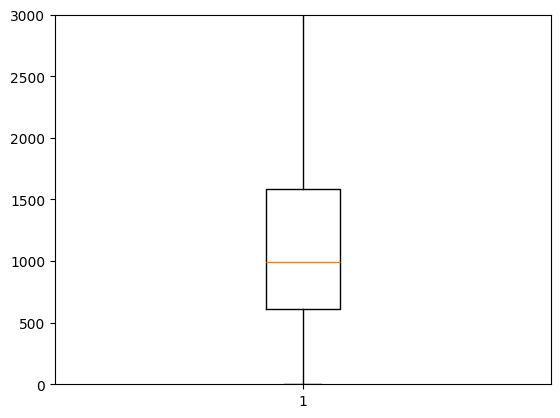

In [11]:
plt.boxplot(df['trip_time'])
plt.ylim(0,3000)
plt.show()

(array([  193671.,  3025954., 13110152.,  2834886.,   102753.]),
 array([    0.,   200.,   500.,  2000.,  5000., 10000.]),
 <BarContainer object of 5 artists>)

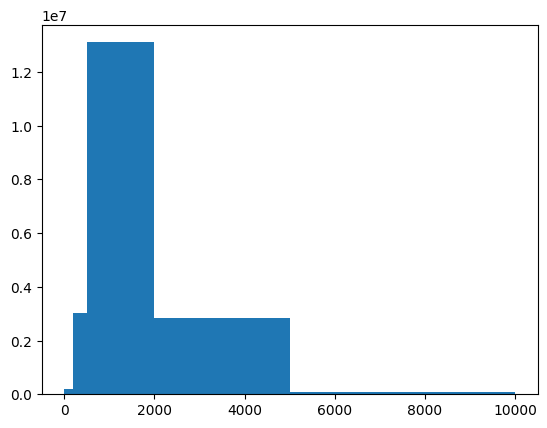

In [12]:
plt.hist(df['trip_time'], bins=[0,200,500,2000, 5000,10000])

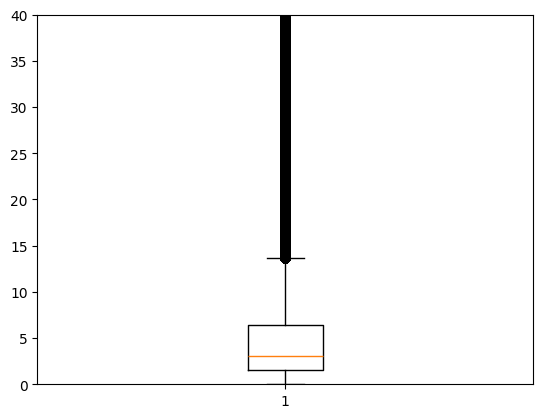

In [27]:
plt.boxplot(df['trip_miles'])
plt.ylim(0,40)
plt.show()

(array([1.926718e+07, 1.988000e+03, 7.800000e+01, 3.000000e+00,
        1.000000e+00]),
 array([  0.   ,  96.352, 192.704, 289.056, 385.408, 481.76 ]),
 <BarContainer object of 5 artists>)

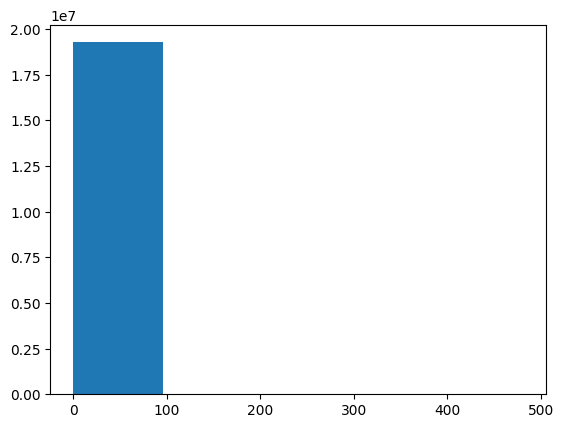

In [13]:
plt.hist(df['trip_miles'], bins=5)

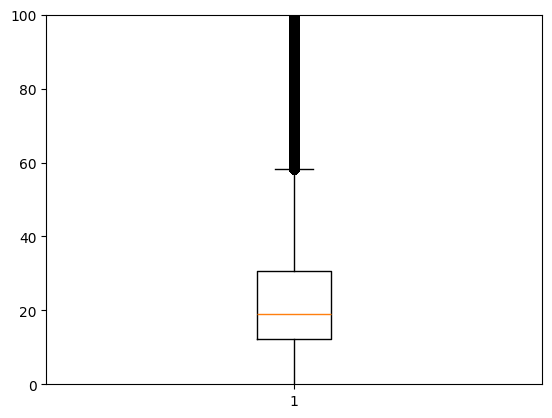

In [25]:
plt.boxplot(df['base_passenger_fare'])
plt.ylim(0,100)
plt.show()

(array([1.5300000e+02, 3.0061570e+06, 1.4469253e+07, 1.5249980e+06,
        2.6834500e+05, 2.3300000e+02]),
 array([-10.,   0.,  10.,  50., 100., 500., 700.]),
 <BarContainer object of 6 artists>)

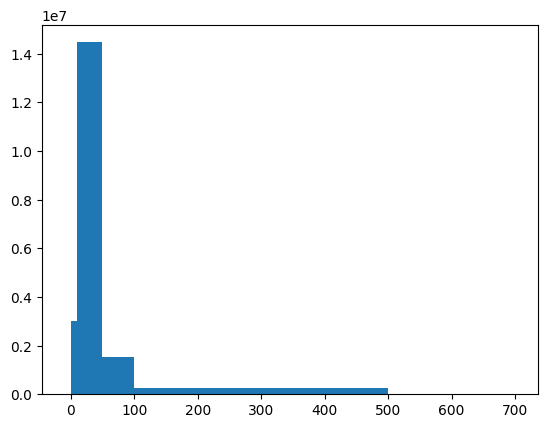

In [21]:
plt.hist(df['base_passenger_fare'], bins=[-10,0,10,50,100,500,700])

(array([4.9000000e+01, 5.8428840e+06, 1.2362049e+07, 9.7289400e+05,
        9.1264000e+04, 7.2000000e+01]),
 array([-10.,   0.,  10.,  50., 100., 500., 700.]),
 <BarContainer object of 6 artists>)

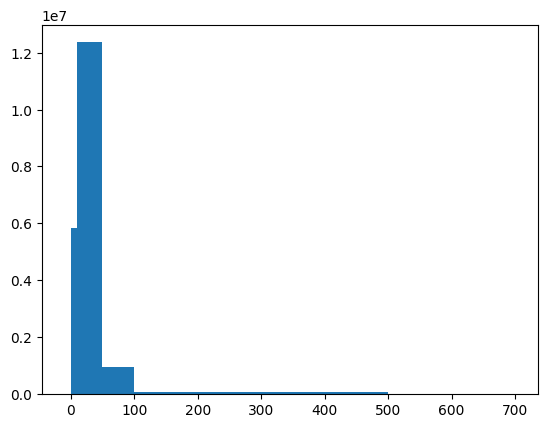

In [31]:
plt.hist(df['driver_pay'], bins=[-10,0,10,50,100,500,700])

In [32]:
time_columns = ['request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']
cantidad_nulos_por_columna = df[time_columns].isnull().sum()
print("Cantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)

Cantidad de valores nulos por columna:
request_datetime           0
on_scene_datetime    5469048
pickup_datetime            0
dropoff_datetime           0
dtype: int64


In [ ]:
# base_passenger_fare: 5 @ 500
# driver_pay: 5 @ 500
# trip_miles : 0.2 @ 100
# trip_time: 500 @ 5000
# nulls in time columns
# PULocationID - DOLocationID : 1@265

In [13]:
df.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,driver_pay
0,2023-11-01 00:31:31,2023-11-01 00:34:10,2023-11-01 00:35:59,2023-11-01 00:44:09,144,79,0.88,490,19.80,12.18
1,2023-11-01 00:52:22,2023-11-01 00:55:07,2023-11-01 00:56:06,2023-11-01 01:11:42,144,80,5.25,936,35.55,25.84
2,2023-11-01 00:11:21,2023-11-01 00:14:32,2023-11-01 00:15:11,2023-11-01 00:17:51,187,187,0.47,160,7.99,10.90
3,2023-11-01 00:38:28,2023-11-01 00:41:44,2023-11-01 00:42:19,2023-11-01 01:15:09,107,7,10.96,1970,34.24,32.92
4,2023-11-01 00:21:54,NaT,2023-11-01 00:28:14,2023-11-01 00:36:08,161,107,1.63,474,11.82,6.65


In [14]:
# Split the DataFrame into parts of 400 thousand rows each
num_rows_per_file = 4000000
num_files = len(df) // num_rows_per_file

for i in range(num_files):
    start_index = i * num_rows_per_file
    end_index = start_index + num_rows_per_file
    subset_df = df.iloc[start_index:end_index]
    subset_df.to_parquet(f'data/batch_{i}.parquet')

# Save the remaining records into a final file if there are less than 400 thousand records
if len(df) % num_rows_per_file != 0:
    remaining_df = df.iloc[num_files * num_rows_per_file:]
    remaining_df.to_parquet(f'data/batch_{num_files}.parquet')